In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from collections import namedtuple  
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import FeatureUnion


In [2]:
env = gym.make('CartPole-v0')
env.reset()

array([ 0.01964741, -0.02541895,  0.03217085, -0.01460623])

In [3]:
class Gradient_Decent_with_eligibility:
    def __init__(self, dimension):
        self.w = np.random.randn(dimension)/np.sqrt(dimension)
        self.learning_rate = 1e-2
    
    def partial_fit(self, X, Y, eligibility_traces):
        self.w += self.learning_rate*(Y-X.dot(self.w))*eligibility_traces
        
    def predict(self, X):
        return X.dot(self.w)

In [4]:
standard = Normalizer(norm='l2')
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
observation_examples = observation_examples.astype(np.float64)
standard.fit(observation_examples)

standarding = standard.transform(observation_examples)
print(observation_examples.shape)
print(observation_examples)
print(standard)
print(standarding)

(10000, 4)
[[ 3.69947970e-01  1.55886219e+38 -2.19321281e-01 -2.42504480e+38]
 [ 5.54118514e-01 -2.38532333e+38  1.15929857e-01 -3.16245034e+38]
 [ 2.79104114e+00  9.32589047e+37  2.54739463e-01  1.91932543e+38]
 ...
 [-4.78505421e+00 -2.83382848e+36  2.86643151e-02  2.59956480e+38]
 [-2.29848433e+00 -1.45570733e+37  1.36124799e-02 -2.71270069e+38]
 [-6.19448602e-01  1.32206952e+38  2.47121587e-01  2.52060558e+38]]
Normalizer(copy=True, norm='l2')
[[ 1.28326629e-39  5.40734229e-01 -7.60776188e-40 -8.41193493e-01]
 [ 1.39887624e-39 -6.02176618e-01  2.92665771e-40 -7.98362901e-01]
 [ 1.30795264e-38  4.37034873e-01  1.19377371e-39  8.99444562e-01]
 ...
 [-1.84060421e-38 -1.09005173e-02  1.10259272e-40  9.99940588e-01]
 [-8.46087449e-39 -5.35855601e-02  5.01084487e-41 -9.98563262e-01]
 [-2.17634316e-39  4.64490025e-01  8.68225992e-40  8.85578352e-01]]


In [5]:
standard = StandardScaler()
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
observation_examples = observation_examples.astype(np.float64)
standard.fit(observation_examples)

standarding = standard.transform(observation_examples)
print(observation_examples.shape)
print(observation_examples)
print("s", standard)
print("m", standard.mean_)
print("ing", standarding)

(10000, 4)
[[ 2.12671447e+00 -2.56586517e+38  3.74487370e-01  2.94300461e+38]
 [ 7.79355884e-01  3.02210662e+38  2.36158714e-01 -2.42044699e+38]
 [ 4.47333860e+00 -2.40777413e+38  1.05342962e-01  9.16121252e+37]
 ...
 [ 7.69115150e-01  3.22517471e+38  2.51196653e-01 -3.29526027e+37]
 [-4.48617125e+00 -1.01892082e+38 -4.09972161e-01  3.30990650e+38]
 [-6.45874381e-01  1.71738099e+38 -1.67104632e-01  7.62160168e+37]]
s StandardScaler(copy=True, with_mean=True, with_std=True)
m [-5.98951643e-03  1.76152519e+36  3.98405185e-03  9.92912798e+35]
ing [[ 0.77288054 -1.32072909  1.53732938  1.48653539]
 [ 0.28460498  1.53595867  0.9633623  -1.23175832]
 [ 1.62328461 -1.23990966  0.42056851  0.45927446]
 ...
 [ 0.2808938   1.63977132  1.02575922 -0.17204198]
 [-1.62359395 -0.52989887 -1.71762847  1.67248787]
 [-0.23189086  0.86895571 -0.70989826  0.38124422]]


In [6]:
standard = MinMaxScaler()
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
observation_examples = observation_examples.astype(np.float64)

standard.fit(observation_examples)

standarding = standard.transform(observation_examples)
print(observation_examples.shape)
print(observation_examples)
print(standard)
print(standarding)

(10000, 4)
[[-4.19085026e+00 -3.21071193e+38 -2.57145733e-01 -2.63400595e+38]
 [ 4.02673626e+00 -1.16441425e+38 -1.80423155e-01  2.71957217e+38]
 [ 2.70347238e+00 -5.08382704e+37 -1.00764282e-01  5.70979684e+36]
 ...
 [ 3.57979441e+00 -2.37846929e+38  1.90232098e-01  1.50293314e+38]
 [ 1.53602731e+00 -1.77888638e+38  3.86826903e-01 -2.14527128e+38]
 [ 1.64983958e-01 -1.41863549e+38 -2.24268109e-01  1.71828518e+38]]
MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.06343618 0.02814569 0.19303426 0.11291464]
 [0.9195146  0.32884905 0.28463103 0.89964312]
 [0.78166176 0.42525286 0.37973336 0.50838251]
 ...
 [0.87295382 0.15044371 0.72714518 0.72085343]
 [0.66004156 0.23855239 0.9618538  0.18473604]
 [0.51721123 0.29149125 0.23228586 0.75250023]]


In [7]:
class Model:
    def __init__(self, env, n_components=500):
        self.env = env
        self.standard = StandardScaler(with_mean=False)
        observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
        observation_examples = observation_examples.astype(np.float64)

        self.standard.fit(observation_examples)
        self.models = []
        self.featurizer = FeatureUnion([
                ("rbf1", RBFSampler(gamma=5.0, n_components=n_components)),
                ("rbf2", RBFSampler(gamma=2.0, n_components=n_components)),
                ("rbf3", RBFSampler(gamma=1.0, n_components=n_components)),
                ("rbf4", RBFSampler(gamma=0.5, n_components=n_components))
                ])
        standarding = self.standard.transform(observation_examples)
        example_features = self.featurizer.fit_transform(standarding)
        self.eligibilities = np.zeros((env.action_space.n, example_features.shape[1]))
        for i in range(env.action_space.n):
            model = Gradient_Decent_with_eligibility(example_features.shape[1])
            self.models.append(model)
    
    def update(self, s, a, G, gamma, lamda):
        X = self.featurizer.transform(self.standard.transform([s]))
        self.eligibilities *= gamma*lamda
        self.eligibilities[a] += X[0]
        self.models[a].partial_fit(X[0], G, self.eligibilities[a])
    
    def predict(self, s):
        X = self.featurizer.transform(self.standard.transform([s]))
        return np.stack([m.predict(X) for m in self.models]).T
    
    def sample_action(self, s, eps):
        if np.random.random() < eps:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.predict(s))

In [8]:
def TD(model, env, eps, gamma=.9999, lamda=.7):
    observation = env.reset()
    done = False
    totalreward = 0
    iters = 0
    while not done:
        action = model.sample_action(observation, eps)
        prev_observation = observation
        observation, reward, done, info = env.step(action)
        guess = model.predict(observation)
        G = reward + gamma*np.max(guess[0])
        model.update(prev_observation, action, G, gamma, lamda)

        totalreward += reward
        iters += 1

    return totalreward

why
(10000, 4)
[[-9.57679868e-01  2.82886717e+38  1.31948357e-02 -1.07468538e+38]
 [-3.35242081e+00  1.28269698e+37  3.41666758e-01  3.18951316e+38]
 [ 6.71409547e-01  2.84340256e+38  3.05710644e-01 -1.31114308e+38]
 ...
 [ 4.41764593e+00  2.29241488e+38  2.74030298e-01 -6.48497747e+37]
 [ 3.07447624e+00  1.44698574e+38 -1.16362497e-01 -1.76984448e+38]
 [ 1.54982376e+00  1.34364311e+38  4.85544242e-02 -2.93178296e+38]]
StandardScaler(copy=True, with_mean=False, with_std=True)
[[-0.34628783  1.4366427   0.05475427 -0.54196836]
 [-1.21220312  0.06514188  1.41780571  1.60848491]
 [ 0.24277523  1.44402451  1.26859956 -0.66121497]
 ...
 [ 1.59737828  1.16420493  1.13713644 -0.32704014]
 [ 1.11170104  0.73485299 -0.48286645 -0.89254002]
 [ 0.56040137  0.68237034  0.20148504 -1.47851048]]
Wtf
1
100
200
300
400
500
600
700
800
900
1000


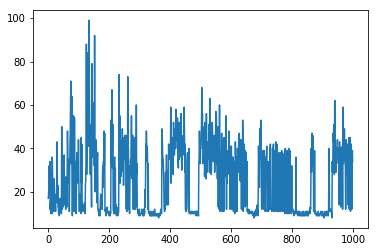

In [10]:
model =Model(env)

episodes = 1000
rewards = []
for i in range(episodes):
    if (i+1)%100==0 or i==0:
        print(i+1)
    eps = 1*(0.99**i)
    reward=TD(env=env, model=model, eps=eps)
    rewards.append(reward)
plt.plot(rewards)
plt.show()
